GOPAL RAI (ROLL NO=21103040)

Consider a trapezoidal channel leading into a rectangular channel. The trapezoidal channel, 
which has a bottom width of 5 m, and side slopes of 1.5H:1V, is 200 m long, and is laid on 
a slope of 0.0008. The rectangular channel has a uniform width of 4 m, and consists of two 
reaches; an upper reach is laid on a slope of 0.0012, while the lower reach is laid on a 
slope of 0.0024. The upper rectangular reach is 150 m long, while the lower rectangular 
reach is 250 m long. Both channels are concrete-lined (n = 0.013). Local losses at the 
junction may be ignored. The rectangular channel terminates in a free overfall, where the 
flow-depth may be assumed to be the critical depth. For a discharge of 10 m3
/s


In [149]:
class Channel:
  def __init__(self,bt,br, m,S1,S2,S3,n, Q):
    self.bt = bt # Trapezoidal Bed width in m
    self.br=br #rectangular Bed width in m
    self.m = m #Side Slope
    self.S1=S1 #longnitudinal slope of trapezoidal section
    self.S2=S2  #longnitudinal slope of rectangular section-1
    self.S3=S3  #longnitudinal slope of rectangular section-2
    self.n=n   #mannings roughness
    self.Q = Q #Discharge in m3/s
c1 = Channel(bt=5,br=4, m=1.5,S1=0.0008,S2=0.0012,S3=0.0024,n=0.013 ,Q=10)    
def Trapezoidal(self):
  import numpy as np
  
  from scipy.optimize import newton
  def func(d_c): #for section 1 critical depth
    return ((self.Q**2)/9.81)-((((self.bt+self.m*d_c)*d_c)**3)/(self.bt + 2*self.m*d_c))
  d_crit = newton(func,1)
  def mannings(y):  #for normal depth
    return ((self.n*self.Q/(self.S1**.5*(self.bt+(self.m*y))*(y)))**1.5)-(((self.bt+self.m*y)*y)/((self.bt+(2*y*(1+self.m**2)**.5))))
  yn = newton(mannings,1)
  return d_crit,yn
  
def Rectangular(self):
  q=self.Q/self.br #for section 2 and 3 critical depth
  y_critical = ((q**2)/9.81)**(1/3)
  from scipy.optimize import newton
  def mannings(y):  #for section 2 normal depth 
    return (((self.n*self.Q)/(self.br*y*self.S2**0.5))**1.5)-((self.br*y)/(self.br+2*y))
  yn = newton(mannings,1)
  def mannings1(y):  #for section 3 normal depth 
    return (((self.n*self.Q)/(self.br*y*self.S3**0.5))**1.5)-((self.br*y)/(self.br+2*y))
  yn1 = newton(mannings1,1)
  return y_critical, yn,yn1
#Trapezoidal(c1)
#Rectangular(c1)


a. determine the normal and critical depths, sketch the normal and critical 
depth lines, and sketch a possible water surface profile (you 
may assume that each part of the channel is sufficiently long)

Normal depths
The normal depth for Q=10m3/s in section-1 is  0.9136448058203017 m
The normal depth for Q=10m3/s in section-2 is  1.154942066712318 m
The normal depth for Q=10m3/s in section-3 is  0.9080156685402592 m
Critical depths
The Critical depth for Q=10m3/s in section-1 is  0.6895914456996765 m
The Critical depth for Q=10m3/s in section-2 is  0.8604725161155776 m
The Critical depth for Q=10m3/s in section-3 is  0.8604725161155776 m


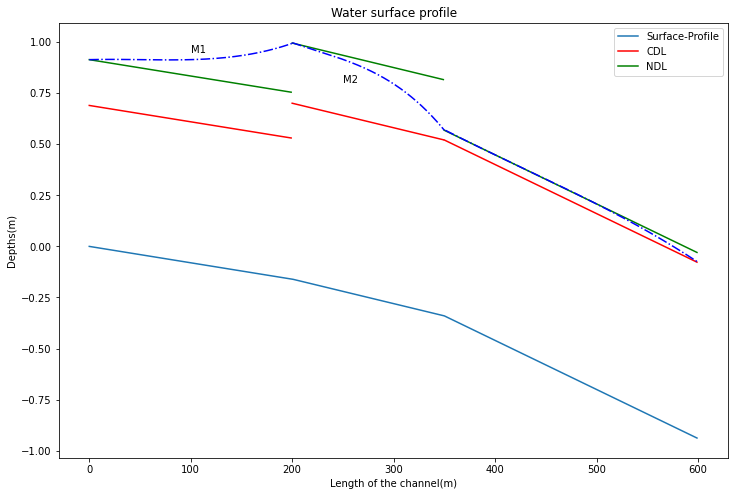

In [150]:
#a
print('Normal depths')
print('The normal depth for Q=10m3/s in section-1 is ',Trapezoidal(c1)[1],'m')
print('The normal depth for Q=10m3/s in section-2 is ',Rectangular(c1)[1],'m')
print('The normal depth for Q=10m3/s in section-3 is ',Rectangular(c1)[2],'m')
print('Critical depths')
print('The Critical depth for Q=10m3/s in section-1 is ',Trapezoidal(c1)[0],'m')
print('The Critical depth for Q=10m3/s in section-2 is ',Rectangular(c1)[0],'m')
print('The Critical depth for Q=10m3/s in section-3 is ',Rectangular(c1)[0],'m')
import numpy as np
d1=-(np.arange(0,200))*0.0008       #datum of trapezoidal section
d2=(-200*.0008)-(np.arange(0,150))*0.0012     #datum of rectangular section-1
d3=(-(200*.0008)-(150*.0012))-(np.arange(0,250))*0.0024  #datum of rectangular section-2
d=np.concatenate((d1,d2,d3))
CDL1=d1+Trapezoidal(c1)[0]
CDL2=d2+Rectangular(c1)[0]
CDL3=d3+Rectangular(c1)[0]
NDL1=d1+Trapezoidal(c1)[1]
NDL2=d2+Rectangular(c1)[1]
NDL3=d3+Rectangular(c1)[2]
x = [NDL1[0],NDL1[50]+.04,NDL1[100]+.08,NDL2[0]]
y = [0,50,100,201]
from scipy.interpolate import make_interp_spline 
X_Y = make_interp_spline(y,x)
X_ = np.linspace(0, 201, 500)
Y_ = X_Y(X_)
x1=[NDL2[0],NDL2[50]-0.02,NDL2[100]-0.08,NDL3[0]]
y1=[201,250,300,350]
X_Y1 = make_interp_spline(y1,x1)
X_1 = np.linspace(200, 350, 500)
Y_1 = X_Y1(X_1)
x2=[NDL3[0],NDL3[50]-0.0002,NDL3[150]-0.0004,CDL3[249]]
y2=[351,400,500,600]
X_Y2 = make_interp_spline(y2,x2)
X_2 = np.linspace(351, 600, 500)
Y_2 = X_Y2(X_2)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

plt.plot(np.arange(0,600),d,label='Surface-Profile')
plt.plot(np.arange(0,200),CDL1,'r',label='CDL')
plt.plot(np.arange(0,200),NDL1,'g',label='NDL')
plt.plot(np.arange(200,350),CDL2,'r',label='CDL')
plt.plot(np.arange(350,600),CDL3,'r',label='CDL')
plt.plot(np.arange(200,350),NDL2,'g',label='NDL')
plt.plot(np.arange(350,600),NDL3,'g',label='NDL')
plt.plot(X_,Y_,'b',ls='-.')
plt.plot(X_1,Y_1,'b',ls='-.')
plt.plot(X_2,Y_2,'b',ls='-.')
plt.text(100, 0.95, 'M1', fontsize = 10)
plt.text(250,0.8,'M2',fontsize = 10)
plt.title('Water surface profile')
plt.xlabel('Length of the channel(m)')
plt.ylabel('Depths(m)')
plt.legend(['Surface-Profile','CDL','NDL'])
plt.show()


b. compute the water surface profile using the standard-step method; draw 
profiles of the channel bottom, water surface elevation, critical depth line, 
normal depth line, and energy grade line, and label each different 
part of the water surface profile; check your solution with your water surface 
profile sketch from part a

Normal depths using standard step method
The normal depth for Q=10m3/s in section-1 is 0.9136448058203017 m
The normal depth for Q=10m3/s in section-2 is 0.9782569138125146 m
The normal depth for Q=10m3/s in section-3 is 1.1639947218842601 m
Critical depths using standard step method
The Critical depth for Q=10m3/s in section-1 is  0.6895914456996765 m
The Critical depth for Q=10m3/s in section-2 is  0.8604725161155776 m
The Critical depth for Q=10m3/s in section-3 is  0.6509085043463999 m


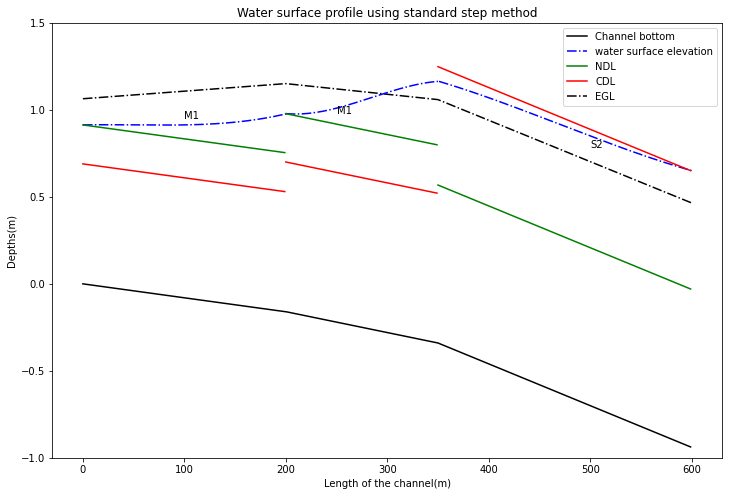

In [151]:
#b
def standard_trap():
  bt,m,Q,n=5,1.5,10,0.013
  def area(y):
    Area=(bt+m*y)*y
    return Area
  def peri(y):
    perimeter=bt+2*y*(1+m**2)**0.5
    return perimeter
  def vel(y):
    velocity=Q/area(y)
    return velocity
  
  from scipy.optimize import newton
  def eq(y):
    eq1=y+(Q**2 /(2*9.81))/((bt+m*y)*y)**2 -0.0032*((5+1.5*y)**(4/3))/y**(10/3) -(Trapezoidal(c1)[1] +vel(Trapezoidal(c1)[1])**2 /(2*9.81))
    return eq1
  y1 = newton(eq,1)
  return y1
def standard_rect1():
  Q,br=10,4
  
  def area(y):
    Area=br*y
    return Area
  def vel(y):
    velocity=Q/area(y)
    return velocity
  from scipy.optimize import newton
  def eq(y):
    eq1=y+0.5585/y**2 -0.0345*((5+1.5*y)**(4/3))/y**(10/3) -(standard_trap() +(vel(standard_trap())**2 )/(2*9.81))
    return eq1
  y1 = newton(eq,1)
  return np.real(y1)

def standard_rect2():
  Q,br=10,4
  
  def area(y):
    Area=br*y
    return Area
  def vel(y):
    velocity=Q/area(y)
    return velocity
  from scipy.optimize import newton
  def eq(y):
    eq1=y+0.5585/y**2 -0.0145*((5+1.5*y)**(4/3))/y**(10/3) -(standard_trap() +(vel(standard_trap())**2 )/(2*9.81))
    return eq1
  y1 = newton(eq,1)
  return np.real(y1)

def EGL_1():
  def Area_t(y):
    area=(5+1.5*y)*y
    return area
  def Area_r(y):
    area1=(4*y)
    return area1
  def Se_t(y):
    Q=10
    se1=y+(Q**2)/((Area_t(y)**2)*2*9.81)
    return se1
  def Se_r(y):
    Q=10
    se2=y+(Q**2)/((Area_r(y)**2)*2*9.81)
    return se2
  EGL1=d1[0]+Se_t(Trapezoidal(c1)[1])
  EGL2=d2[0]+Se_r(standard_trap())
  EGL3=d3[0]+Se_r(standard_rect1())
  EGL4=d3[-1]+Se_r(standard_rect2())
  EGL=[EGL1,EGL2,EGL3,EGL4]
  return EGL

x=[0,200]
y=[Trapezoidal(c1)[1],standard_trap()]
x1=[200,349]
y1=[standard_trap(),standard_rect1()]
x2=[350,600]
y2=[standard_rect1(),standard_rect2()]
d_2=-(np.arange(0,150))*0.0012
d_3=-(np.arange(0,250))*0.0024
NDL_2=d_2+standard_trap()
NDL_3=d_3+standard_rect1()
CDL_3=d_3+standard_rect1()+(standard_rect2()-NDL_3[-1])
x_1 = [NDL1[0],NDL1[50]+.04,NDL1[100]+.08,NDL_2[0]]
y_1 = [0,50,100,201]
from scipy.interpolate import make_interp_spline 
X_Y12 = make_interp_spline(y_1,x_1)
X_3 = np.linspace(0, 201, 500)
Y_3 = X_Y12(X_3)
x_2=[1.1639947,1.07,0.85,0.65090850]
y_2=[351,400,500,600]
X_Y2 = make_interp_spline(y_2,x_2)
X_4 = np.linspace(351, 600, 500)
Y_4 = X_Y2(X_4)
x_3=[0.97825691,1.01,1.1,1.1639947]
y_3=[201,250,300,350]
X_Y3 = make_interp_spline(y_3,x_3)
X_5 = np.linspace(200, 350, 500)
Y_5 = X_Y3(X_5)
x3=[0,200,350,600]
plt.figure(figsize=(12,8))
plt.plot(np.arange(0,600),d,'black')
plt.plot(X_3,Y_3,'b',ls='-.')
plt.plot(np.arange(0,200),NDL1,'g')
plt.plot(np.arange(0,200),CDL1,'r',label='CDL')
plt.plot(x3,EGL_1(),'black',ls='-.')
plt.plot(X_4,Y_4,'b',ls='-.')
plt.plot(X_5,Y_5,'b',ls='-.')
plt.plot(np.arange(200,350),NDL_2,'g',label='NDL')
plt.plot(np.arange(350,600),NDL3,'g',label='NDL')
plt.plot(np.arange(200,350),CDL2,'r',label='CDL')
plt.plot(np.arange(350,600),CDL_3,'r',label='NDL')
plt.text(100, 0.95, 'M1', fontsize = 10)
plt.text(250, 0.98, 'M1', fontsize = 10)
plt.text(500, 0.78, 'S2', fontsize = 10)
plt.legend(['Channel bottom','water surface elevation','NDL','CDL','EGL'])
plt.ylim(-1,1.5)
plt.title('Water surface profile using standard step method')
plt.xlabel('Length of the channel(m)')
plt.ylabel('Depths(m)')
print('Normal depths using standard step method')
print('The normal depth for Q=10m3/s in section-1 is',Trapezoidal(c1)[1],'m')
print('The normal depth for Q=10m3/s in section-2 is',standard_trap(),'m')
print('The normal depth for Q=10m3/s in section-3 is',standard_rect1(),'m')
print('Critical depths using standard step method')
print('The Critical depth for Q=10m3/s in section-1 is ',Trapezoidal(c1)[0],'m')
print('The Critical depth for Q=10m3/s in section-2 is ',Rectangular(c1)[0],'m')
print('The Critical depth for Q=10m3/s in section-3 is ',standard_rect2(),'m')


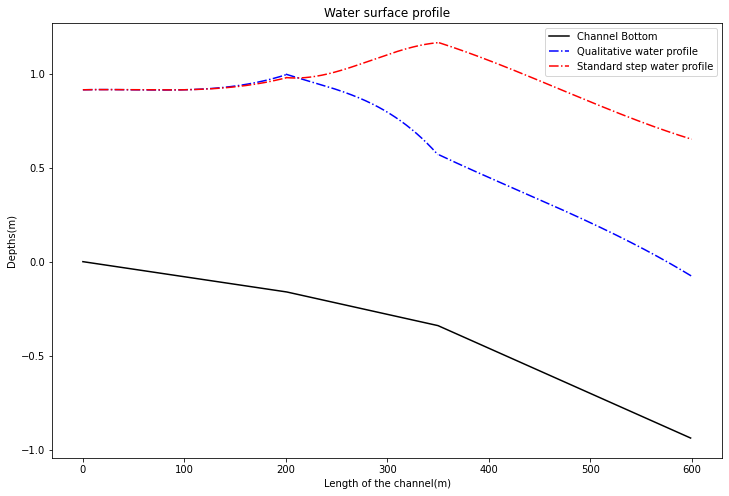

In [153]:
#comparison
plt.figure(figsize=(12,8))
plt.plot(np.arange(0,600),d,'black',label='Channel Bottom')
plt.plot(X_,Y_,'b',ls='-.',label='Qualitative water profile')
plt.plot(X_1,Y_1,'b',ls='-.')
plt.plot(X_2,Y_2,'b',ls='-.')
plt.plot(X_3,Y_3,'r',ls='-.',label='Standard step water profile')
plt.plot(X_4,Y_4,'r',ls='-.')
plt.plot(X_5,Y_5,'r',ls='-.')
plt.legend()
plt.title('Water surface profile')
plt.xlabel('Length of the channel(m)')
plt.ylabel('Depths(m)')
plt.show()

from standard step method we are getting M1 and S2 water surface profile for rectangular section-1 and 2 respectively, whereas from direct method we are getting M2 and M2 water surface profile for rectangular section-1 and 2 respectively